# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arquivo = 'Mod06 - Aula 01 CSV.csv'

sinasc_ro = pd.read_csv(arquivo)

sinasc_ro.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
sinasc_ro.loc[(sinasc_ro['APGAR5'] <= 3), 'APGAR_CAT'] = 'asfixia grave'
sinasc_ro.loc[(sinasc_ro['APGAR5'] >= 4) & (sinasc_ro['APGAR5'] <= 5), 'APGAR_CAT'] = 'asfixia moderada'
sinasc_ro.loc[(sinasc_ro['APGAR5'] >= 6) & (sinasc_ro['APGAR5'] <= 7), 'APGAR_CAT'] = 'asfixia leve'
sinasc_ro.loc[(sinasc_ro['APGAR5'] >= 8), 'APGAR_CAT'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

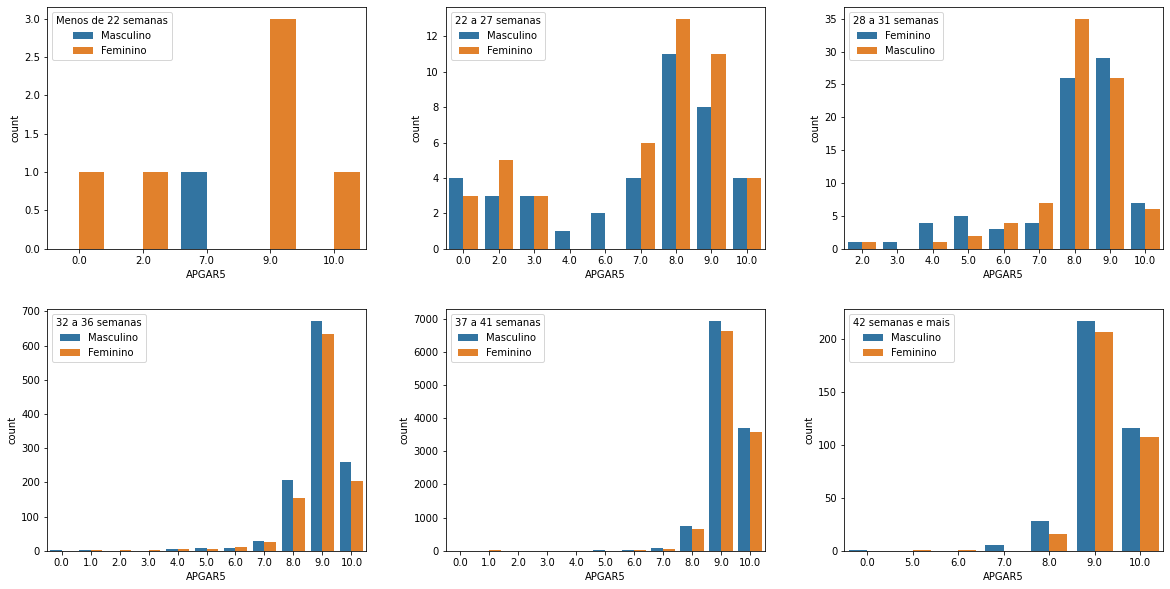

In [4]:
#sinasc_ro['GESTACAO'].unique()

listagestacao = [['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas'],
                 ['32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']]

plt.rc('figure', figsize = (20, 10))

fig, axes = plt.subplots(2, 3)

for i in range(len(listagestacao)):
    for j in range(len(listagestacao[i])):
        sns.countplot(ax = axes[i, j]
                      , x = 'APGAR5'
                      , hue = 'SEXO'
                      , data = sinasc_ro[sinasc_ro['GESTACAO'] == listagestacao[i][j]]
                     ).legend(loc = 'upper left').set(title=listagestacao[i][j])

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

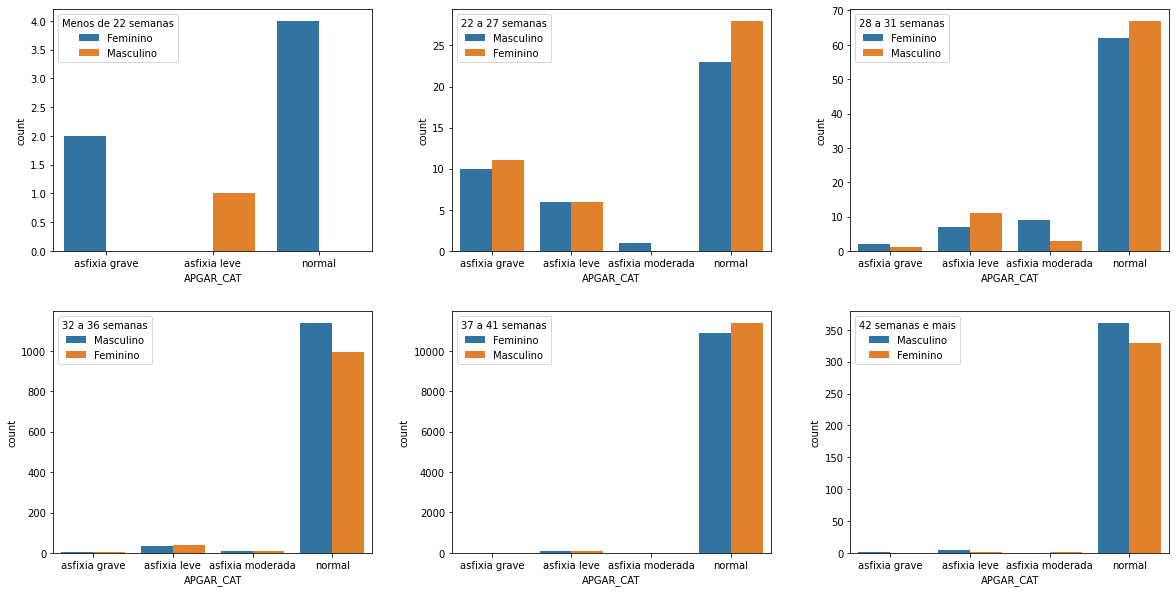

In [5]:
#ACHEI ESTRANHO USAR O APGAR5, E AQUI USAREI O APGAR_CAT QUE É O CATEGORIZADO

listagestacao = [['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas'],
                 ['32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']]

plt.rc('figure', figsize = (20, 10))

fig, axes = plt.subplots(2, 3)

for i in range(len(listagestacao)):
    for j in range(len(listagestacao[i])):
        sns.countplot(ax = axes[i, j]
                      , x = 'APGAR_CAT'
                      , hue = 'SEXO'
                      , data = sinasc_ro[sinasc_ro['GESTACAO'] == listagestacao[i][j]].sort_values(by='APGAR_CAT')
                     ).legend(loc = 'upper left').set(title=listagestacao[i][j])

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
freq_apgar5 = pd.crosstab(sinasc_ro['GESTACAO'], sinasc_ro['APGAR5'])

freq_apgar5

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


In [7]:
#AQUI COM AS CATEGORIAS DO APGAR

freq_apgarcat = pd.crosstab(sinasc_ro['GESTACAO'], sinasc_ro['APGAR_CAT'])

freq_apgarcat

APGAR_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
freq_apgar5_pctlin = freq_apgar5.div(freq_apgar5.sum(axis = 1), axis = 0)

freq_apgar5_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [9]:
#APGAR CATEGORIA

freq_apgarcat_pctlin = freq_apgarcat.div(freq_apgarcat.sum(axis = 1), axis = 0)

freq_apgarcat_pctlin

APGAR_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

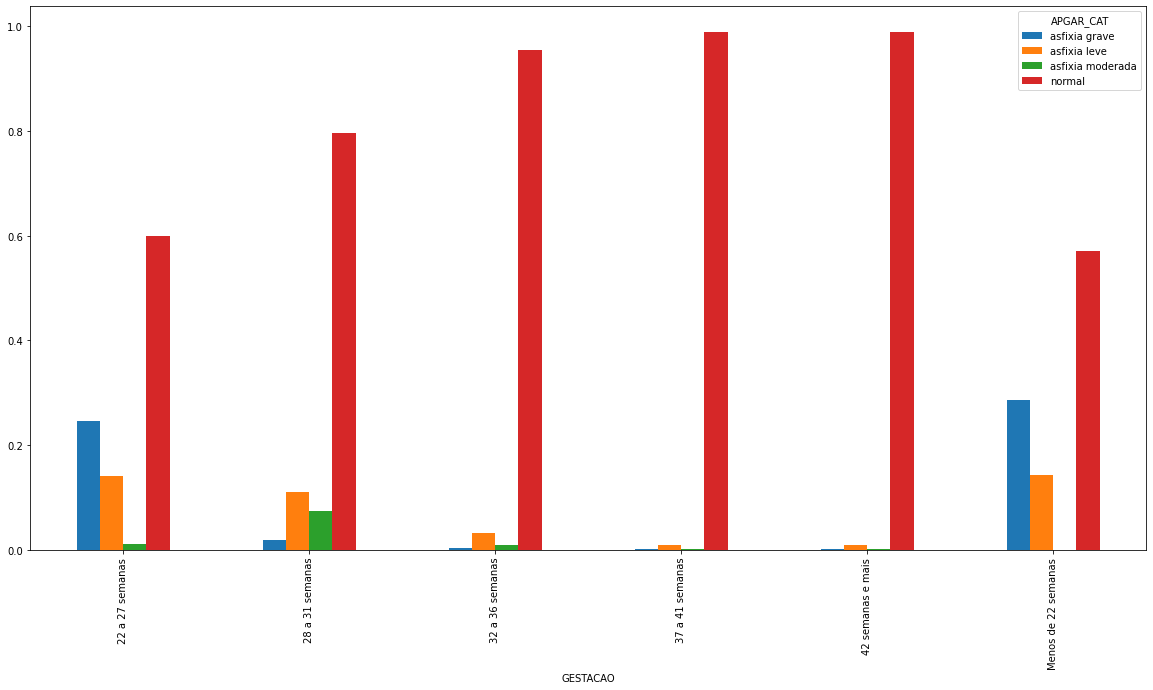

In [10]:
freq_apgarcat_pctlin.plot.bar()

##### Pelo gráfico gerado, mostra que quando abaixo de 37 semanas, a porcentagem do bebe ter asfixia é maior. Porém acredito que seria necessário mais informações para ter mais segurança.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

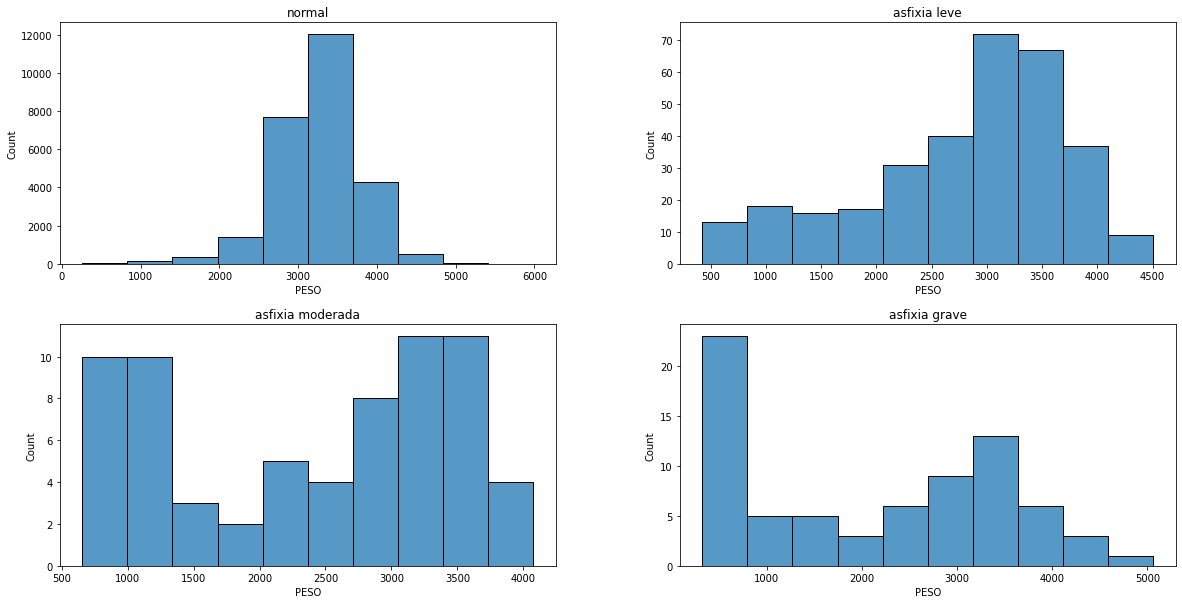

In [11]:
listaapgar = [['normal', 'asfixia leve'],
                 ['asfixia moderada', 'asfixia grave']]

plt.rc('figure', figsize = (20, 10))

fig, axes = plt.subplots(2, 2)

for i in range(len(listaapgar)):
    for j in range(len(listaapgar[i])):
        sns.histplot(ax = axes[i, j]
                     , x = 'PESO'
                     , bins = 10
                     , data = sinasc_ro[sinasc_ro['APGAR_CAT'] == listaapgar[i][j]]
                    ).set(title=listaapgar[i][j])

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

<AxesSubplot:xlabel='PESO'>

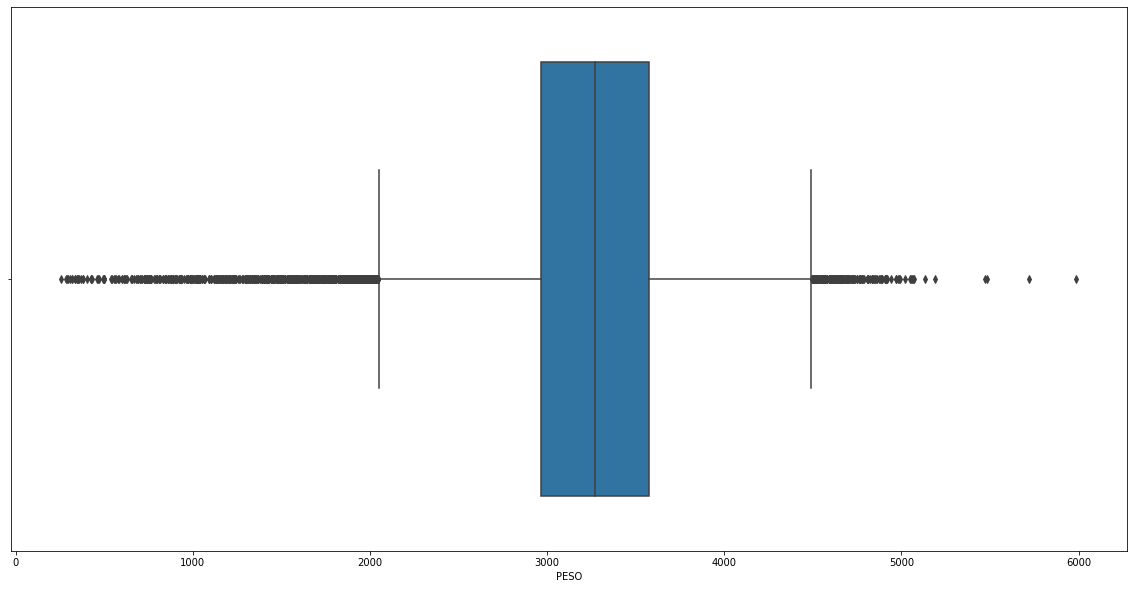

In [12]:
sns.boxplot(x = 'PESO'
            , data = sinasc_ro
           )

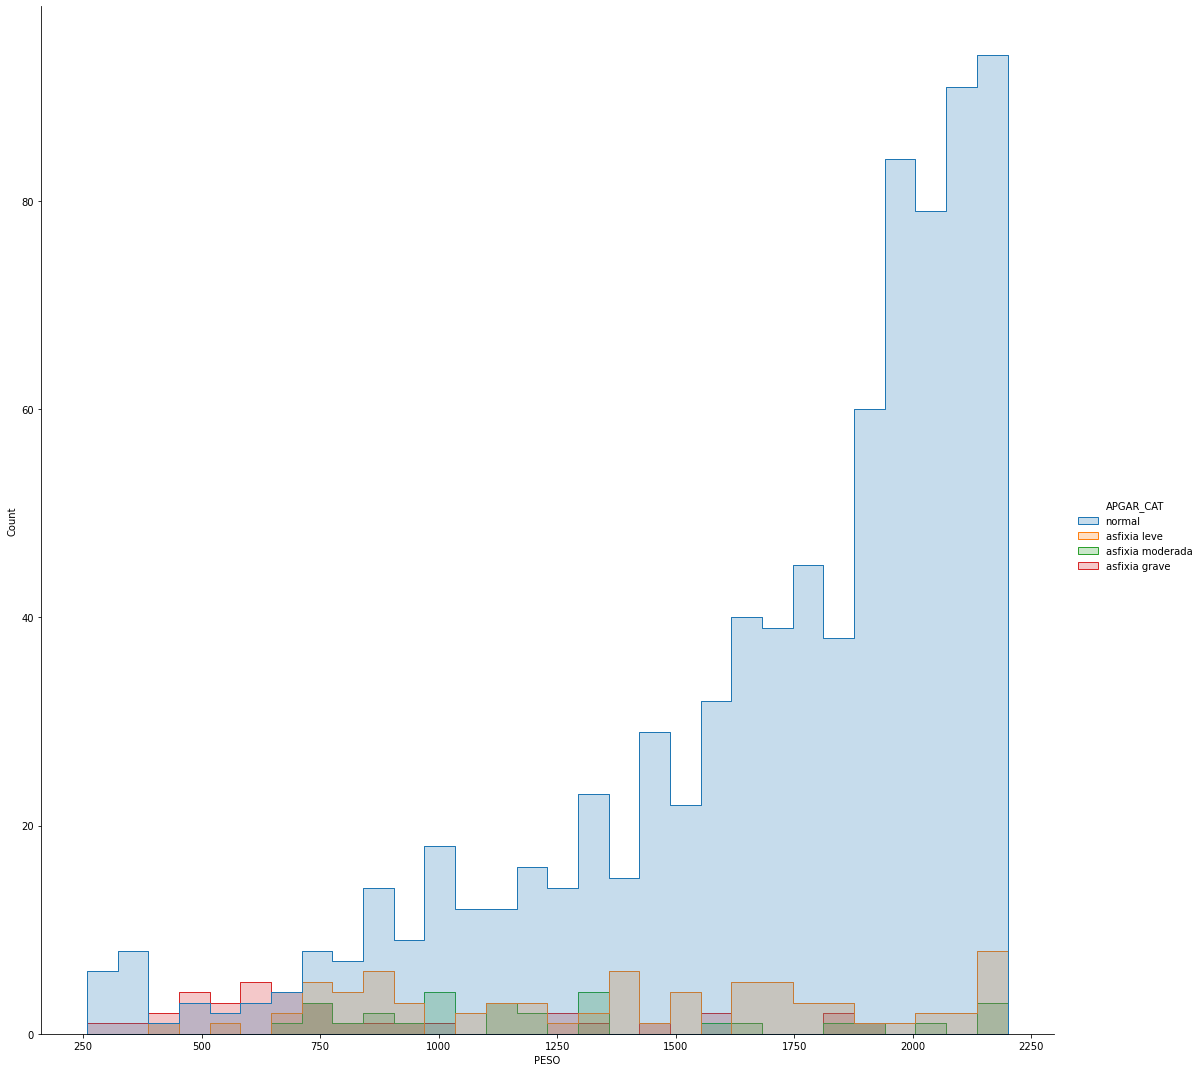

In [13]:
sns.displot(data = sinasc_ro[sinasc_ro['PESO'] <= 2200]
            , x = 'PESO'
            , hue = 'APGAR_CAT'
            , hue_order = ['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave']
            , bins = 30
            , element = 'step'
            , height = 15
           )

Para o gráfico acima, foram escolhidos os registros que apresentavam o PESO menor que 2200g, pois ao utilizar abaixo de 3000g ou 3kg ficava um pouco difícil de analisar. Nesse caso, o peso do bebe tem relação com o APGAR5.

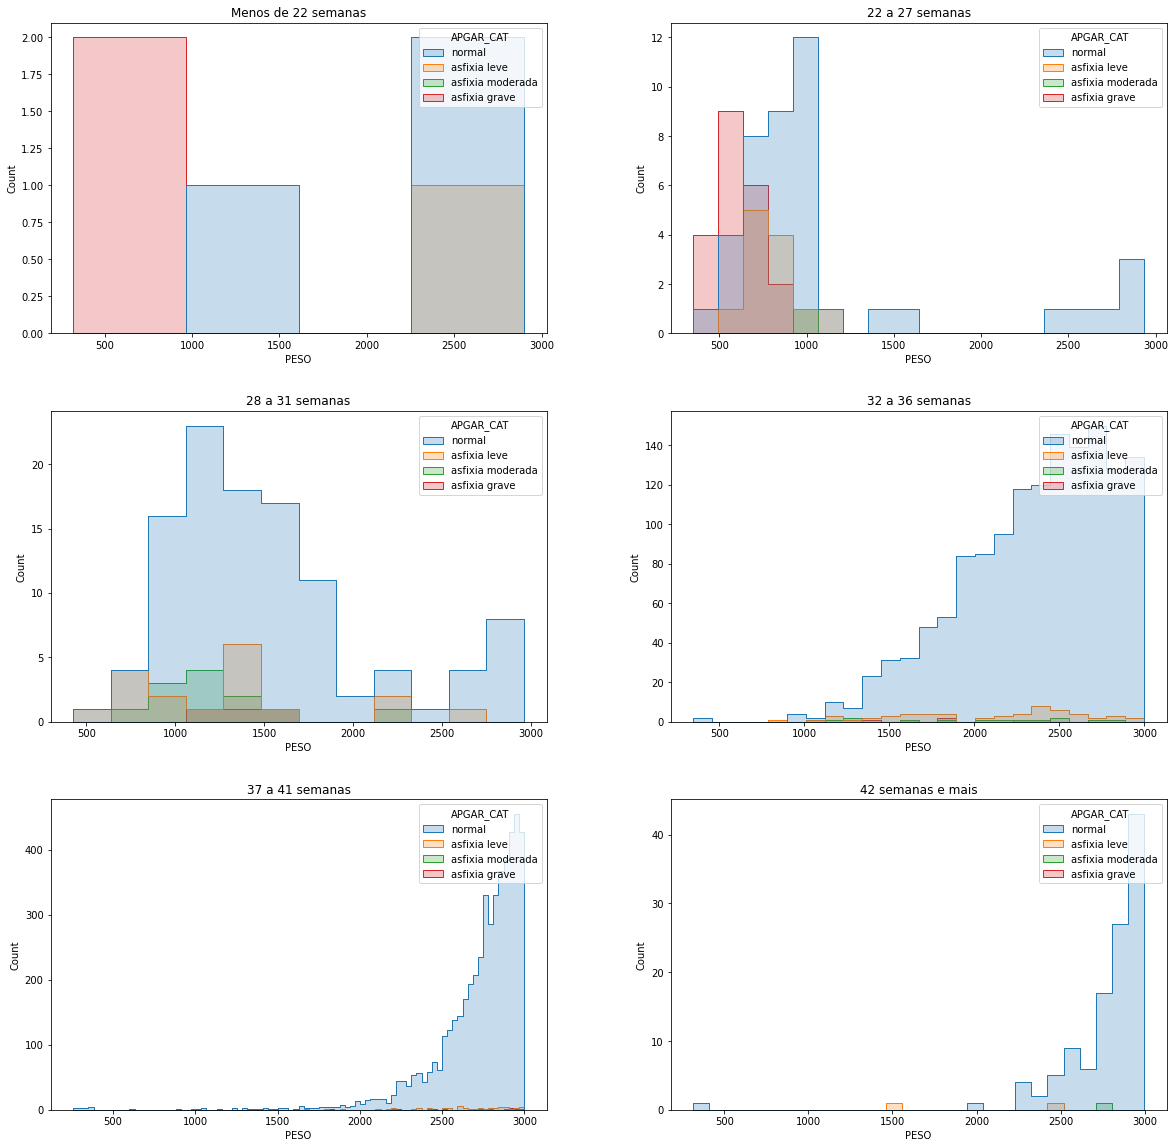

In [14]:
listagestacao = [['Menos de 22 semanas', '22 a 27 semanas'], 
                 ['28 a 31 semanas', '32 a 36 semanas'], 
                 ['37 a 41 semanas', '42 semanas e mais']]

plt.rc('figure', figsize = (20, 20))

fig, axes = plt.subplots(3, 2)

for i in range(len(listagestacao)):
    for j in range(len(listagestacao[i])):
        sns.histplot(ax = axes[i, j]
                     , x = 'PESO'
                     , hue = 'APGAR_CAT'
                     , hue_order = ['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave']
                     , element = 'step'
                     , data = sinasc_ro[(sinasc_ro['GESTACAO'] == listagestacao[i][j]) 
                                        & (sinasc_ro['PESO'] < 3000)]
                    ).set_title(listagestacao[i][j])

plt.subplots_adjust(wspace = 0.25, hspace = 0.25)




Complementando, ao analisar por tempo de gestação, quando for antes de 31 semanas, a probabilidade de ter uma asfixia estar relacionada com o peso abaixo de 3 kgs é maior. Porém, acredito que seria necessário adicionar mais dados de outros estados, para melhorar a confiabilidade.